# <h1 align=center> **EDA** </h1>
# <h1 align=center>**`GOOGLE MAPS`**</h1>

Importar las librerias necesarias.

In [74]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast
import seaborn as sns
import matplotlib.pyplot as plt

>**`Dataset 'df_estados.csv'`**

Cargar el dataset 'credits.csv' en un dataframe usando la librería pandas.

In [75]:
df_estados = pd.read_csv('df_estados.csv', encoding='UTF-8')

In [76]:
#filtrando columnas del dataset para dejar solo con las que se van a trabajar
df_estados= df_estados.iloc[:,2:]
pd.options.display.max_columns=0
df_estados.head(2)

,name_x,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url,category_hotel,user_id,name_y,time,rating,text,pics,resp,estado
0,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,NaN,NaN,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Hotel,1.126652e+20,Charlie Cline,1454821094934,4,Good location. Nice staff. Clean. Breakfast ar...,NaN,NaN,Alabama
1,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,NaN,NaN,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Hotel,1.086380e+20,Jennifer Passmore,1491966256419,5,Super clean very friendly,NaN,NaN,Alabama


In [77]:
df_estados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58216 entries, 0 to 58215
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name_x            58216 non-null  object 
 1   address           58196 non-null  object 
 2   gmap_id           58216 non-null  object 
 3   description       38407 non-null  object 
 4   latitude          58216 non-null  float64
 5   longitude         58216 non-null  float64
 6   category          58216 non-null  object 
 7   avg_rating        58216 non-null  float64
 8   num_of_reviews    58216 non-null  int64  
 9   price             0 non-null      float64
 10  hours             0 non-null      float64
 11  MISC              10746 non-null  object 
 12  state             0 non-null      float64
 13  relative_results  56268 non-null  object 
 14  url               58216 non-null  object 
 15  category_hotel    58216 non-null  object 
 16  user_id           58216 non-null  float6

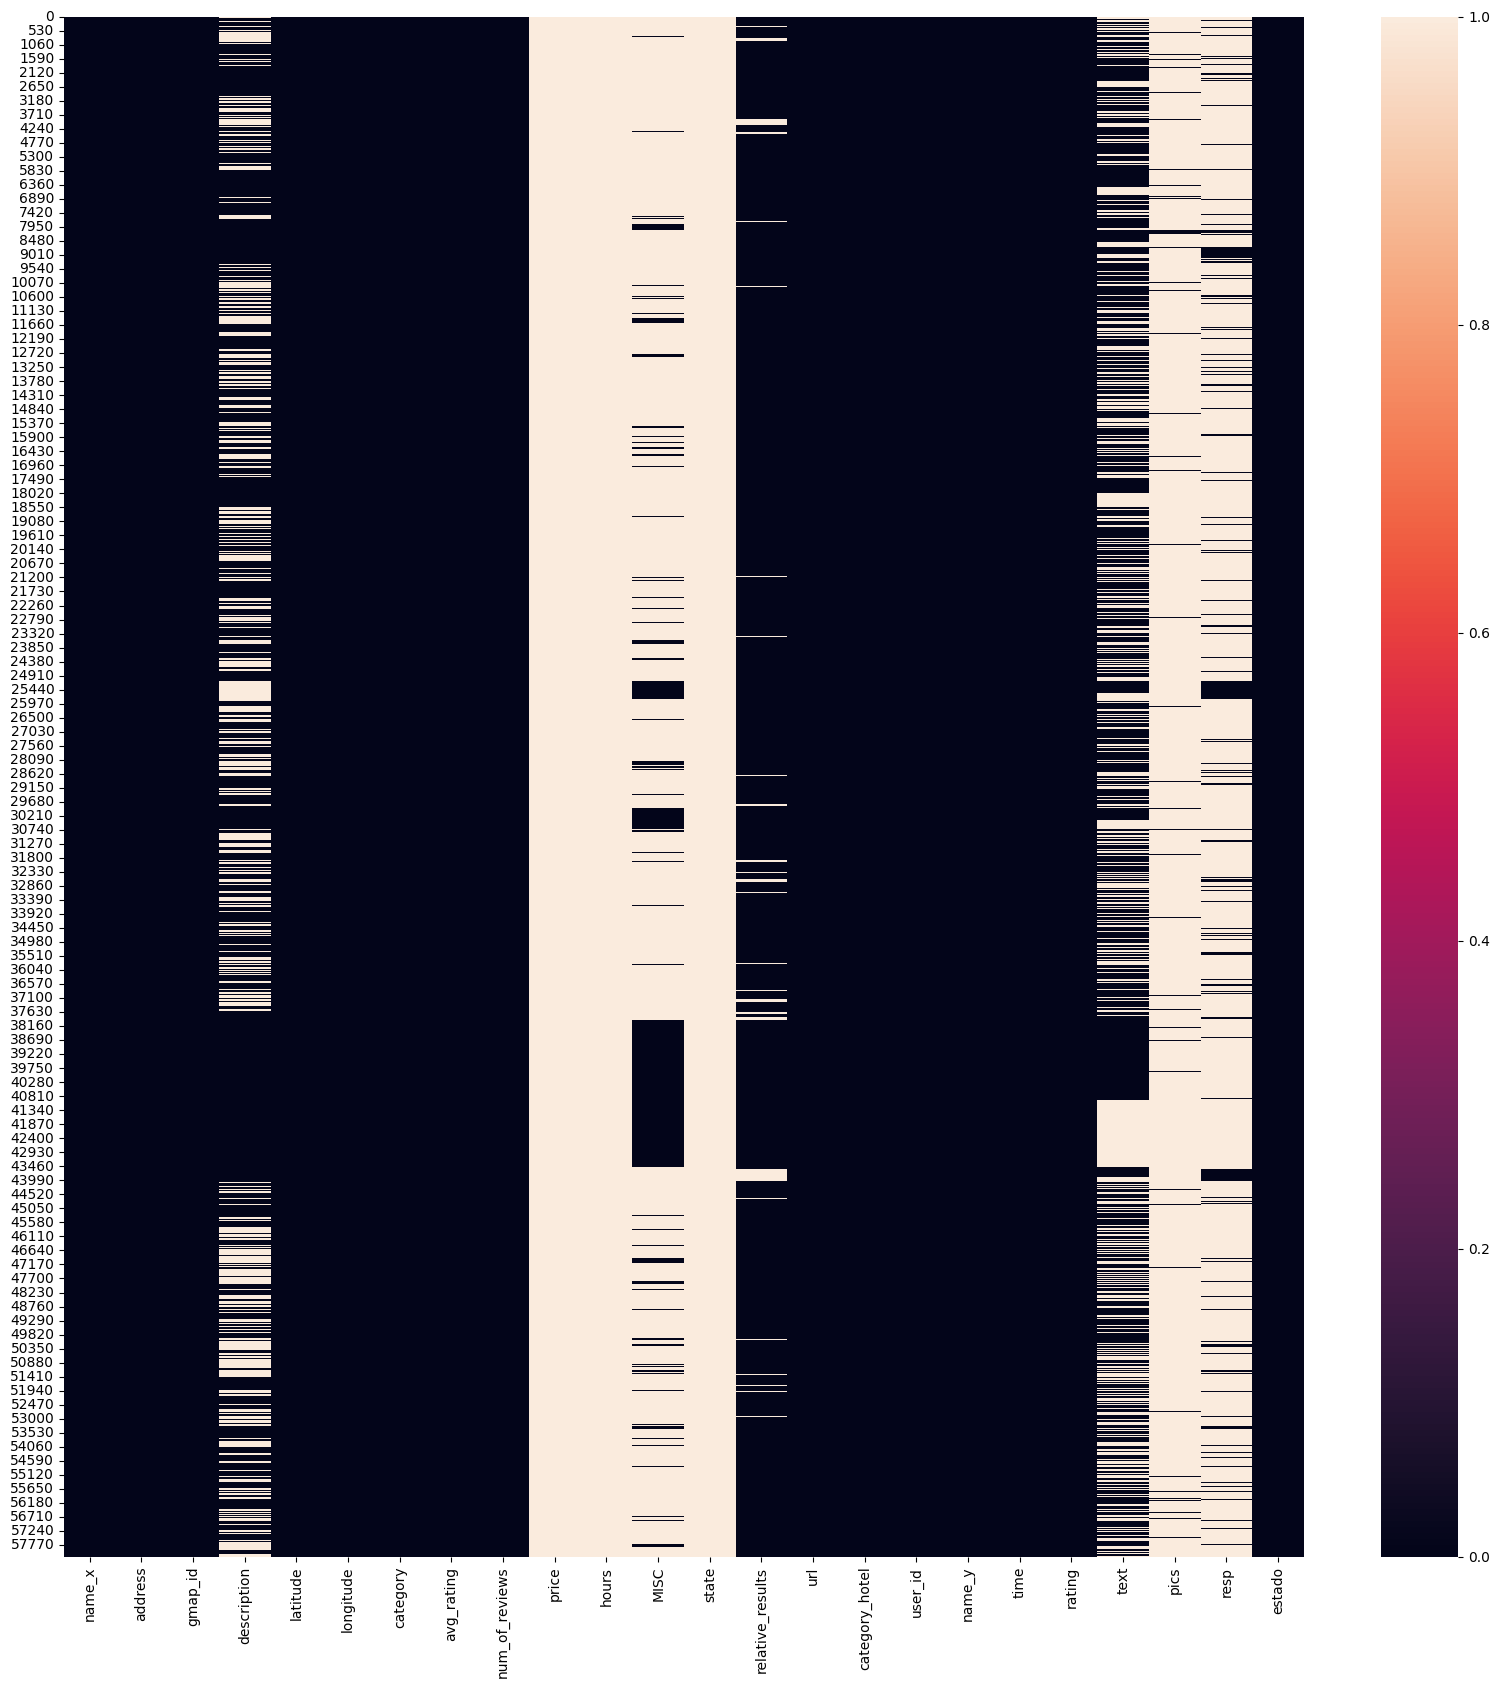

In [78]:
#Gráficando mapa de calor para conocer de visualmente si se encuentran valores nulos contenidos en las distintas variables del dataframe
plt.figure(figsize=[20,20])
sns.heatmap(df_estados.isnull(), color= "blue") 
plt.show()

In [79]:
df_estados = df_estados.loc[:,['estado', 'name_x', 'address', 'gmap_id', 'description', 'latitude', 'longitude',
                               'category', 'avg_rating', 'num_of_reviews', 'MISC', 'relative_results',
                               'url', 'name_y', 'rating', 'text'
                               ]].rename(columns={'estado':'state', 'name_x':'name_hotel', 'name_y':'name_user', 'rating':'rating_user', 'text':'text_user'})
df_estados.head(10)

,state,name_hotel,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,MISC,relative_results,url,name_user,rating_user,text_user
0,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Charlie Cline,4,Good location. Nice staff. Clean. Breakfast ar...
1,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Jennifer Passmore,5,Super clean very friendly
2,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,TheBeckyboo926,5,Amazing! We had a conference room and it was a...
3,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,yolanda arellano,3,A bit on the pricey side but they take on pets...
4,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Greg Randall,4,Solid hotel. Staff was friendly. Room was clean.
5,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Aron Wilde,4,Convenient to interstate and restaurants.
6,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Segun Ajigbeda,5,It was good
7,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,fabyan dal gobbo,5,Like home
8,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Jeremy Fanning,4,NaN
9,Alabama,Holiday Inn Express & Suites Fultondale,"Holiday Inn Express & Suites Fultondale, 1733 ...",0x88890491e9416625:0x2f85307a06ddb16,Unfussy rooms & suites in a relaxed hotel offe...,33.609814,-86.807733,['Hotel'],3.7,38,NaN,"['0x88890492ef4ca701:0x34f0c46c887eaf73', '0x8...",https://www.google.com/maps/place//data=!4m2!3...,Roderick Bush,2,NaN


In [82]:
#Obteniendo una descripción o resumen estadísitico de las variables numericas del dataframe
df_estados.describe().round(2)

,latitude,longitude,avg_rating,num_of_reviews,rating_user
count,58216.00,58216.00,58216.00,58216.00,58216.00
mean,37.32,-94.27,3.62,1198.62,3.71
std,5.09,15.31,0.71,2560.91,1.41
min,19.73,-157.96,1.50,8.00,1.00
25%,33.95,-100.91,3.00,58.00,3.00
50%,36.87,-92.68,3.80,133.00,4.00
75%,41.10,-82.51,4.10,428.00,5.00
max,71.29,-68.01,5.00,8668.00,5.00


In [83]:
#Visualizando los valores duplicados
df_estados.duplicated().any()

True

<Axes: >

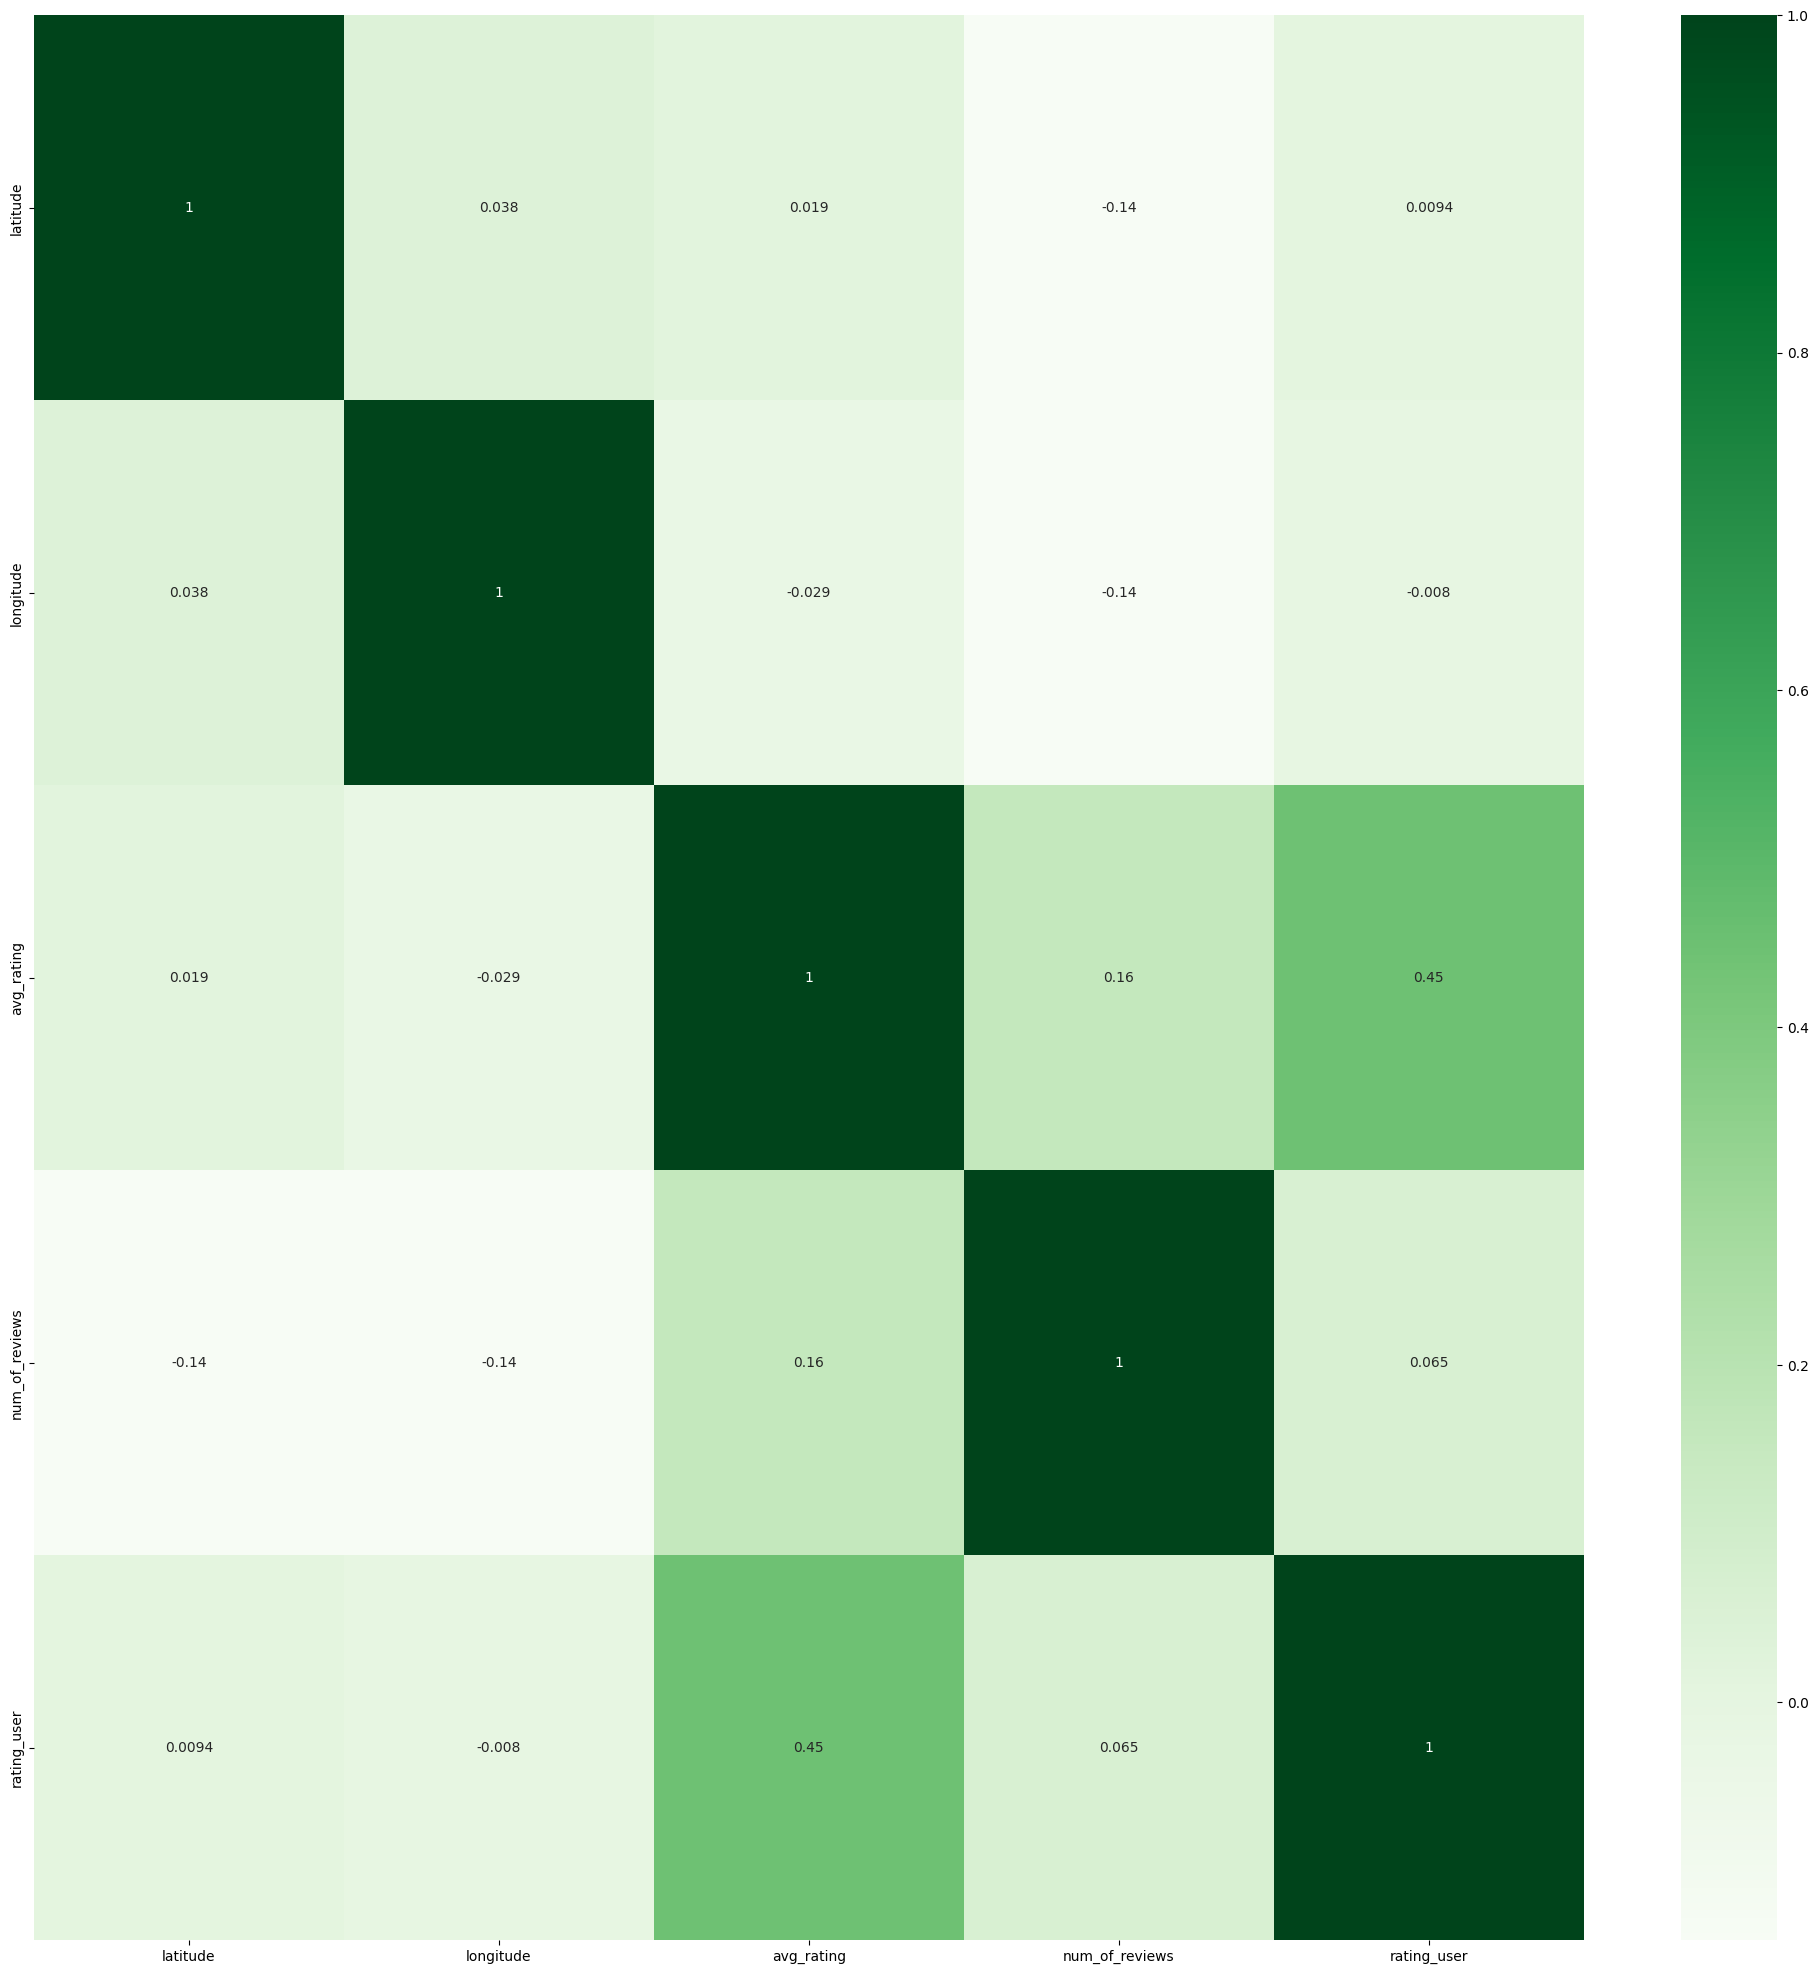

In [86]:
#visualizando la correlación de las variables númericas del df
correlac = df_estados.corr(numeric_only = True)
plt.figure(figsize=[25,25])
sns.heatmap(correlac, annot=True, cmap='Greens')

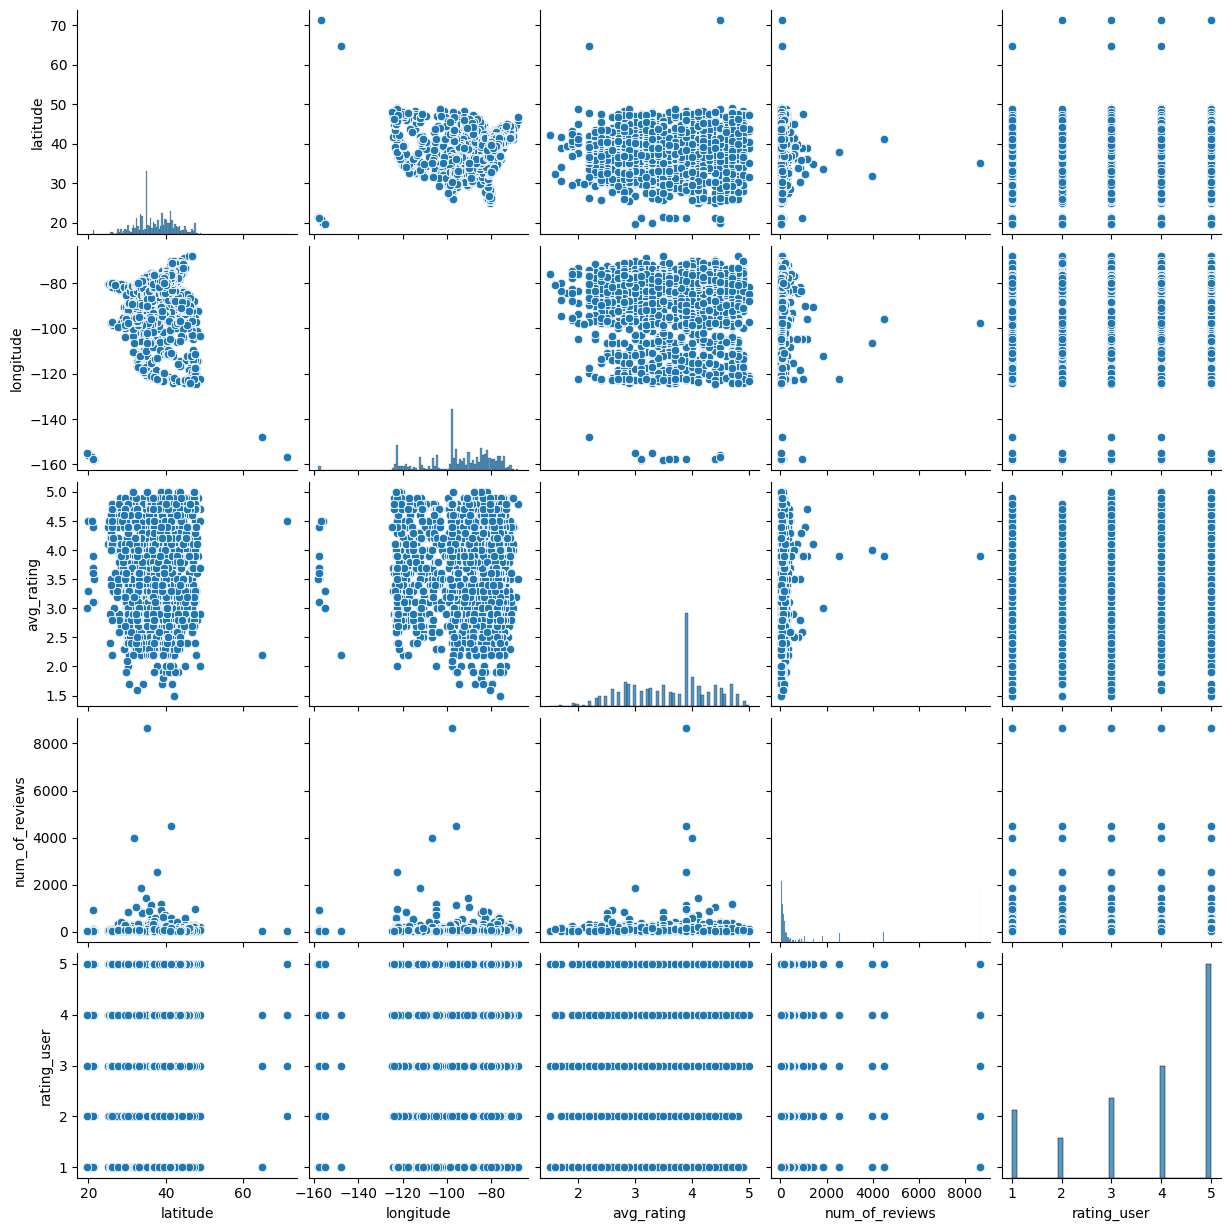

In [87]:
#Haciendo uso del pairplot con todas las variables
sns.pairplot(df_estados)